In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
# Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
sc = MinMaxScaler()

In [8]:
training_set_scaled = sc.fit_transform(training_set)

In [9]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [10]:
# Creating a Data Structure with 60 timesteps and 1 output

In [11]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60 : i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [13]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
# ReShaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [15]:
# Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
# Initialising the RNN

In [17]:
regressor = Sequential()

In [18]:
# ADDing first LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [19]:
# ADDing second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [20]:
# ADDing third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [21]:
# ADDing forth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [22]:
# Adding the Output Layer
regressor.add(Dense(units=1))

In [23]:
# Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Fitting the RNN in the Training set
regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
38/38 [==============================] - 7s 67ms/step - loss: 0.0531
Epoch 2/10
38/38 [==============================] - 3s 68ms/step - loss: 0.0065
Epoch 3/10
38/38 [==============================] - 3s 68ms/step - loss: 0.0054
Epoch 4/10
38/38 [==============================] - 2s 64ms/step - loss: 0.0050
Epoch 5/10
38/38 [==============================] - 3s 68ms/step - loss: 0.0050
Epoch 6/10
38/38 [==============================] - 3s 66ms/step - loss: 0.0056
Epoch 7/10
38/38 [==============================] - 2s 64ms/step - loss: 0.0049
Epoch 8/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0049
Epoch 9/10
38/38 [==============================] - 3s 81ms/step - loss: 0.0042
Epoch 10/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0041


In [26]:
#Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [27]:
# Getting the Predicted stock price of 2017

In [28]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [30]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values

In [31]:
inputs = inputs.reshape(-1,1)

In [32]:
inputs = sc.transform(inputs)

In [33]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60 : i, 0])
    
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [34]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


In [35]:
predicted_stock_price

array([[805.2381 ],
       [806.39435],
       [807.28906],
       [807.939  ],
       [808.3972 ],
       [808.75433],
       [809.10187],
       [809.5045 ],
       [810.0071 ],
       [810.6325 ],
       [811.3829 ],
       [812.2413 ],
       [813.17865],
       [814.1657 ],
       [815.1752 ],
       [816.2236 ],
       [817.3525 ],
       [818.61926],
       [820.05676],
       [821.6164 ]], dtype=float32)

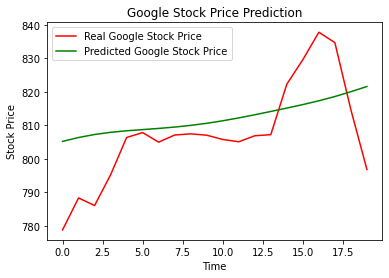

In [36]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()